<a href="https://colab.research.google.com/github/imhrishita/ML/blob/main/Keras-STP-BOD-Prediction3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
from google.colab import files
uploaded = files.upload()

Saving STP.csv to STP.csv


In [5]:
stp=pd.read_csv("STP.csv")
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  136 non-null    object 
 1   Influent BOD5         136 non-null    int64  
 2   Influent TSS          136 non-null    int64  
 3   Influent NH3          136 non-null    float64
 4   temperature           136 non-null    float64
 5   Influent pH           136 non-null    float64
 6   Influent Alkalinity   136 non-null    int64  
 7   Effluent BOD5         136 non-null    float64
 8   Effluent TSS          136 non-null    float64
 9   Effluent NH3          136 non-null    float64
 10  Aerobic NOx           136 non-null    float64
 11  Effluent pH           136 non-null    float64
 12  Field MLSS            136 non-null    float64
 13  Anoxic tank DO        136 non-null    float64
 14  Aerobic NH3           136 non-null    float64
 15  Aerobic DO            1

In [6]:
stp.pop('Influent TSS')
stp.pop('Effluent TSS')
stp.pop('Unnamed: 16')
stp.pop('Date')
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Influent BOD5         136 non-null    int64  
 1   Influent NH3          136 non-null    float64
 2   temperature           136 non-null    float64
 3   Influent pH           136 non-null    float64
 4   Influent Alkalinity   136 non-null    int64  
 5   Effluent BOD5         136 non-null    float64
 6   Effluent NH3          136 non-null    float64
 7   Aerobic NOx           136 non-null    float64
 8   Effluent pH           136 non-null    float64
 9   Field MLSS            136 non-null    float64
 10  Anoxic tank DO        136 non-null    float64
 11  Aerobic NH3           136 non-null    float64
 12  Aerobic DO            136 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 13.9 KB


In [7]:
X=stp.drop(['Effluent BOD5'],axis=1).values
y=stp['Effluent BOD5'].values

In [113]:
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=23)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full, random_state=23)

In [114]:
X_train.shape, y_train.shape

((76, 12), (76,))

In [115]:
X_valid.shape, y_valid.shape

((26, 12), (26,))

In [116]:
X_test.shape, y_test.shape

((34, 12), (34,))

In [117]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [118]:
np.random.seed(23)
tf.random.set_seed(23)

In [119]:
model = tf.keras.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[12]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(30, activation="sigmoid"),
    keras.layers.Dense(1)
])

In [120]:
model.compile(loss="mean_squared_error",
              optimizer=keras.optimizers.SGD(learning_rate=1e-2),
              metrics=['mae'])

In [121]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("OptimumTrainedModel.h5",save_best_only=True)

In [122]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [123]:
model_history=model.fit(X_train,y_train, epochs=900, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/900
3/3 [==============================] - 0s 70ms/step - loss: 25.5157 - mae: 4.3194 - val_loss: 8.1825 - val_mae: 2.3957
Epoch 2/900
3/3 [==============================] - 0s 12ms/step - loss: 11.5911 - mae: 2.4027 - val_loss: 4.0622 - val_mae: 1.3793
Epoch 3/900
3/3 [==============================] - 0s 11ms/step - loss: 8.0923 - mae: 1.8175 - val_loss: 2.7632 - val_mae: 1.1262
Epoch 4/900
3/3 [==============================] - 0s 11ms/step - loss: 6.9027 - mae: 1.6262 - val_loss: 2.5735 - val_mae: 1.1117
Epoch 5/900
3/3 [==============================] - 0s 11ms/step - loss: 6.6114 - mae: 1.6034 - val_loss: 2.5194 - val_mae: 1.1340
Epoch 6/900
3/3 [==============================] - 0s 13ms/step - loss: 6.4162 - mae: 1.6267 - val_loss: 2.5244 - val_mae: 1.1494
Epoch 7/900
3/3 [==============================] - 0s 12ms/step - loss: 6.3166 - mae: 1.6524 - val_loss: 2.4527 - val_mae: 1.1104
Epoch 8/900
3/3 [==============================] - 0s 13ms/step - loss: 6.2670 - mae: 1.

In [124]:
mae_test=model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 2.1553 - mae: 1.1108


In [126]:
model_history.history

{'loss': [25.515701293945312,
  11.591137886047363,
  8.092293739318848,
  6.902685642242432,
  6.61137580871582,
  6.416162014007568,
  6.316555976867676,
  6.267023086547852,
  6.163740634918213,
  5.998022556304932,
  5.867115497589111,
  5.786901950836182,
  5.687270641326904,
  5.562889099121094,
  5.448863983154297,
  5.331239223480225,
  5.377222061157227,
  5.170211315155029,
  5.047287940979004,
  4.986454010009766,
  4.995291709899902,
  4.895650863647461,
  4.809196949005127,
  4.671164035797119,
  4.594759464263916,
  4.52187967300415,
  4.43229341506958,
  4.411042213439941,
  4.2923784255981445,
  4.209110260009766,
  4.1466827392578125,
  4.069723129272461],
 'mae': [4.319427013397217,
  2.402707576751709,
  1.8174952268600464,
  1.626198172569275,
  1.603446364402771,
  1.626656413078308,
  1.6523617506027222,
  1.5943671464920044,
  1.6300956010818481,
  1.639752984046936,
  1.6068235635757446,
  1.5571544170379639,
  1.5354952812194824,
  1.5490968227386475,
  1.48521

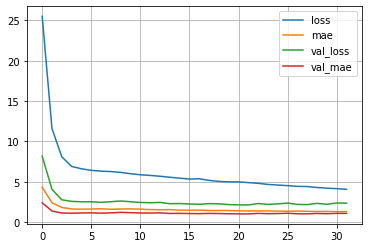

In [127]:
pd.DataFrame(model_history.history).plot(kind='line')
plt.grid(True)
plt.show()

In [128]:
y_predict=model.predict(X_test)
y_predict,y_test.round(4)

(array([[3.241973 ],
        [5.4583826],
        [4.6782193],
        [3.7271118],
        [4.1513352],
        [5.270622 ],
        [4.824537 ],
        [3.931946 ],
        [3.959938 ],
        [3.3468134],
        [5.3300114],
        [4.5086894],
        [3.6567354],
        [3.8301442],
        [5.063445 ],
        [4.2516837],
        [4.824745 ],
        [4.9561744],
        [4.107559 ],
        [3.737052 ],
        [4.394104 ],
        [5.4794664],
        [5.364946 ],
        [3.679769 ],
        [4.50734  ],
        [4.682631 ],
        [5.324393 ],
        [4.117063 ],
        [4.4639573],
        [5.059511 ],
        [5.1244783],
        [2.9126132],
        [3.3524463],
        [3.8108208]], dtype=float32),
 array([2.95, 4.  , 2.  , 3.84, 2.  , 3.  , 1.  , 2.33, 5.  , 3.57, 2.  ,
        6.  , 4.  , 4.6 , 5.5 , 2.46, 3.  , 5.  , 4.  , 3.73, 4.  , 4.  ,
        4.5 , 3.87, 4.  , 5.  , 5.78, 3.5 , 4.  , 4.  , 4.2 , 1.26, 1.  ,
        4.5 ]))